In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# **Project 3: Class Size and Test Scores in New York State**

# **Overview**
This project explores the relationship between class size and math test scores across different grade levels in New York State. Using datasets from the New York City Open Data source, the analysis aims to uncover whether smaller class sizes consistently lead to better student performance and how this trend varies by grade.

**Datasets to be used**

I used two datasets from the New York City Open Data source.
- Class size data: [2018-2019 Average Class Size Distrct K8](https://data.cityofnewyork.us/Education/2018-2019-Average-Class-Size-District-K8/4jus-39vu/about_data)
- Test scores data: [Math Test Results 2013-2023](https://data.cityofnewyork.us/Education/Math-Test-Results-2013-2023/74kb-55u9/about_data)

**Analysis question**

1. Does a smaller class size lead to better test scores?
2. Is this trend consistent across all grade levels, or does it vary by grade?

**Columns that will be used**

- Columns for class size data: District, Grade Level, Program Type, Number of Students, Number of Classes, Average Class Size

- Columns for test scores data: District, Grade, Year, Mean Scale Score

**Columns to be used to merge**
- Columns for class size data: District, Grade Level, Average Class Size	

- Columns for test scores data: District, Grade, Mean Scale Score

**Hypothesis**
- Smaller class sizes enable more personalized attention from teachers, leading to improved student performance.

- This is especially true for younger grades (K-3), where individual attention may have a more significant impact. As students progress to higher grades (4-8), they become more independent learners, and the effect of class size on performance diminishes.

**Site URL: [Computing in Context - Akane Nakamura](https://an3235.readthedocs.io/en/latest/index.html)**

## **Step 1: Data loading**
I imported two essential packages, pandas and plotly. Next, I loaded the datasets for class size and test scores into the notebook and used the `.info()` method to inspect the structure, column types, and completeness of the data.

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
class_df = pd.read_csv("2018-2019_Average_Class_Size.csv")
test_df = pd.read_csv("Math_Results_2013-2023.csv")

FileNotFoundError: [Errno 2] No such file or directory: '2018-2019_Average_Class_Size.csv'

In [ ]:
class_df.head()

,District,Grade Level,Program Type,Number of Students,Number of Classes,Average Class Size
0,1,K,Gen Ed,313,17,18.4
1,1,K,G&T,113,5,22.6
2,1,K,ICT,318,17,18.7
3,1,1,Gen Ed,196,10,19.6
4,1,1,G&T,36,2,18.0


In [ ]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            848 non-null    int64  
 1   Grade Level         848 non-null    object 
 2   Program Type        848 non-null    object 
 3   Number of Students  848 non-null    int64  
 4   Number of Classes   848 non-null    int64  
 5   Average Class Size  848 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 39.9+ KB


In [ ]:
test_df.head()

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,575,454,113,19.7,160,27.8,146,25.4,156,27.1,302,52.5
1,1,4,2023,All Students,537,455,145,27.0,94,17.5,160,29.8,138,25.7,298,55.5
2,1,5,2023,All Students,559,456,180,32.2,89,15.9,110,19.7,180,32.2,290,51.9
3,1,6,2023,All Students,558,461,127,22.8,108,19.4,153,27.4,170,30.5,323,57.9
4,1,7,2023,All Students,586,460,107,18.3,127,21.7,156,26.6,196,33.4,352,60.1


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          2016 non-null   int64  
 1   Grade             2016 non-null   object 
 2   Year              2016 non-null   int64  
 3   Category          2016 non-null   object 
 4   Number Tested     2016 non-null   int64  
 5   Mean Scale Score  2016 non-null   int64  
 6   # Level 1         2016 non-null   int64  
 7   % Level 1         2016 non-null   float64
 8   # Level 2         2016 non-null   int64  
 9   % Level 2         2016 non-null   float64
 10  # Level 3         2016 non-null   int64  
 11  % Level 3         2016 non-null   float64
 12  # Level 4         2016 non-null   int64  
 13  % Level 4         2016 non-null   float64
 14  # Level 3+4       2016 non-null   int64  
 15  % Level 3+4       2016 non-null   float64
dtypes: float64(5), int64(9), object(2)
memory 

## **Step 2: Data Cleaning**

Since I aim to analyze the relationship between class size and test scores for 2018, I filtered the dataset to include only the test scores data from 2018.

In [ ]:
test_df['Grade'] = pd.to_numeric(test_df['Grade'], errors='coerce').astype('Int64')
test_df_2018 = test_df[test_df['Year'] == 2018]
test_df_2018.head()

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
21,1,3,2018,All Students,710,603,182,25.6,127,17.9,180,25.4,221,31.1,401,56.5
22,1,4,2018,All Students,741,600,225,30.4,169,22.8,131,17.7,216,29.1,347,46.8
23,1,5,2018,All Students,714,603,232,32.5,114,16.0,137,19.2,231,32.4,368,51.5
24,1,6,2018,All Students,772,601,263,34.1,122,15.8,147,19.0,240,31.1,387,50.1
25,1,7,2018,All Students,744,600,263,35.3,148,19.9,146,19.6,187,25.1,333,44.8


In [ ]:
test_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 21 to 1980
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          224 non-null    int64  
 1   Grade             192 non-null    Int64  
 2   Year              224 non-null    int64  
 3   Category          224 non-null    object 
 4   Number Tested     224 non-null    int64  
 5   Mean Scale Score  224 non-null    int64  
 6   # Level 1         224 non-null    int64  
 7   % Level 1         224 non-null    float64
 8   # Level 2         224 non-null    int64  
 9   % Level 2         224 non-null    float64
 10  # Level 3         224 non-null    int64  
 11  % Level 3         224 non-null    float64
 12  # Level 4         224 non-null    int64  
 13  % Level 4         224 non-null    float64
 14  # Level 3+4       224 non-null    int64  
 15  % Level 3+4       224 non-null    float64
dtypes: Int64(1), float64(5), int64(9), object(1)
me

Since the test score data covers grades 3 to 8, I selected the class size data for the same grade range.

In [ ]:
class_df['Grade Level'] = pd.to_numeric(class_df['Grade Level'], errors='coerce').astype('Int64')
class_df2 = class_df[class_df['Grade Level'].isin([3, 4, 5, 6, 7, 8])]
class_df2.head()

,District,Grade Level,Program Type,Number of Students,Number of Classes,Average Class Size
11,1,3,Gen Ed,122,6,20.3
12,1,3,G&T,44,2,22.0
13,1,3,ICT,483,21,23.0
14,1,3,ICT & G&T,119,4,29.8
15,1,4,Gen Ed,193,9,21.4


Each District contains multiple schools, but for this analysis, I used data from grades 3 to 8 for each District. According to New York State, regardless of the program type, all students take the same math test, so there is no need to differentiate by program type.

In [ ]:
def aggregate_test_data(district, grade_level):
    filtered_data = class_df2[(class_df2['District'] == district) & (class_df2['Grade Level'] == grade_level)]
    aggregated_data = filtered_data[['Number of Students', 'Number of Classes', 'Average Class Size']].sum()
    weighted_class_size = (filtered_data['Number of Students'] * filtered_data['Average Class Size']).sum() / aggregated_data['Number of Students']
    aggregated_data['Average Class Size'] = weighted_class_size
    return aggregated_data

aggregated_results = []

for district in range(1, 33):  
    for grade in range(3, 9):  
        aggregated_data = aggregate_test_data(district, grade)
        aggregated_data['District'] = district
        aggregated_data['Grade Level'] = grade
        aggregated_results.append(aggregated_data)

class_df3 = pd.DataFrame(aggregated_results)

class_df3 = class_df3[['District', 'Grade Level', 'Number of Students', 'Number of Classes', 'Average Class Size']]

class_df3['District'] = class_df3['District'].astype(int)
class_df3['Grade Level'] = class_df3['Grade Level'].astype(int)
class_df3['Number of Students'] = class_df3['Number of Students'].astype(int)
class_df3['Number of Classes'] = class_df3['Number of Classes'].astype(int)
class_df3['Average Class Size'] = class_df3['Average Class Size'].round(2)

class_df3.reset_index(drop=True, inplace=True)
class_df3 = class_df3.rename(columns={'Grade Level': 'Grade'})

class_df3.head(10)

,District,Grade,Number of Students,Number of Classes,Average Class Size
0,1,3,768,33,23.57
1,1,4,648,29,22.67
2,1,5,660,29,23.06
3,1,6,723,34,21.27
4,1,7,736,33,22.30
5,1,8,744,33,22.61
6,2,3,2652,104,25.57
7,2,4,2667,103,25.90
8,2,5,2658,102,26.08
9,2,6,2800,97,28.91


In [ ]:
class_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            192 non-null    int32  
 1   Grade               192 non-null    int32  
 2   Number of Students  192 non-null    int32  
 3   Number of Classes   192 non-null    int32  
 4   Average Class Size  192 non-null    float64
dtypes: float64(1), int32(4)
memory usage: 4.6 KB


## **Step 3: Data Merge**
I merged the data using District, Grade, Average Class Size, and Mean Scale Score.

In [ ]:
test_df_2018_2 = test_df_2018[['District', 'Grade', 'Mean Scale Score']]

test_df_2018_2.head()

,District,Grade,Mean Scale Score
21,1,3,603
22,1,4,600
23,1,5,603
24,1,6,601
25,1,7,600


In [ ]:
test_df_2018_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 21 to 1980
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   District          224 non-null    int64
 1   Grade             192 non-null    Int64
 2   Mean Scale Score  224 non-null    int64
dtypes: Int64(1), int64(2)
memory usage: 7.2 KB


In [ ]:
class_df4 = class_df3[['District', 'Grade', 'Average Class Size']]
class_df4.head()

,District,Grade,Average Class Size
0,1,3,23.57
1,1,4,22.67
2,1,5,23.06
3,1,6,21.27
4,1,7,22.30


In [ ]:
class_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            192 non-null    int32  
 1   Grade               192 non-null    int32  
 2   Average Class Size  192 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 3.1 KB


In [ ]:
merge_data = pd.merge(class_df4, test_df_2018_2, on=['District', 'Grade'])
merge_data.head()

,District,Grade,Average Class Size,Mean Scale Score
0,1,3,23.57,603
1,1,4,22.67,600
2,1,5,23.06,603
3,1,6,21.27,601
4,1,7,22.30,600


## **Step 4: Data Visualization**

In order to explore the relationship between class size and test scores, I created a scatter plot.

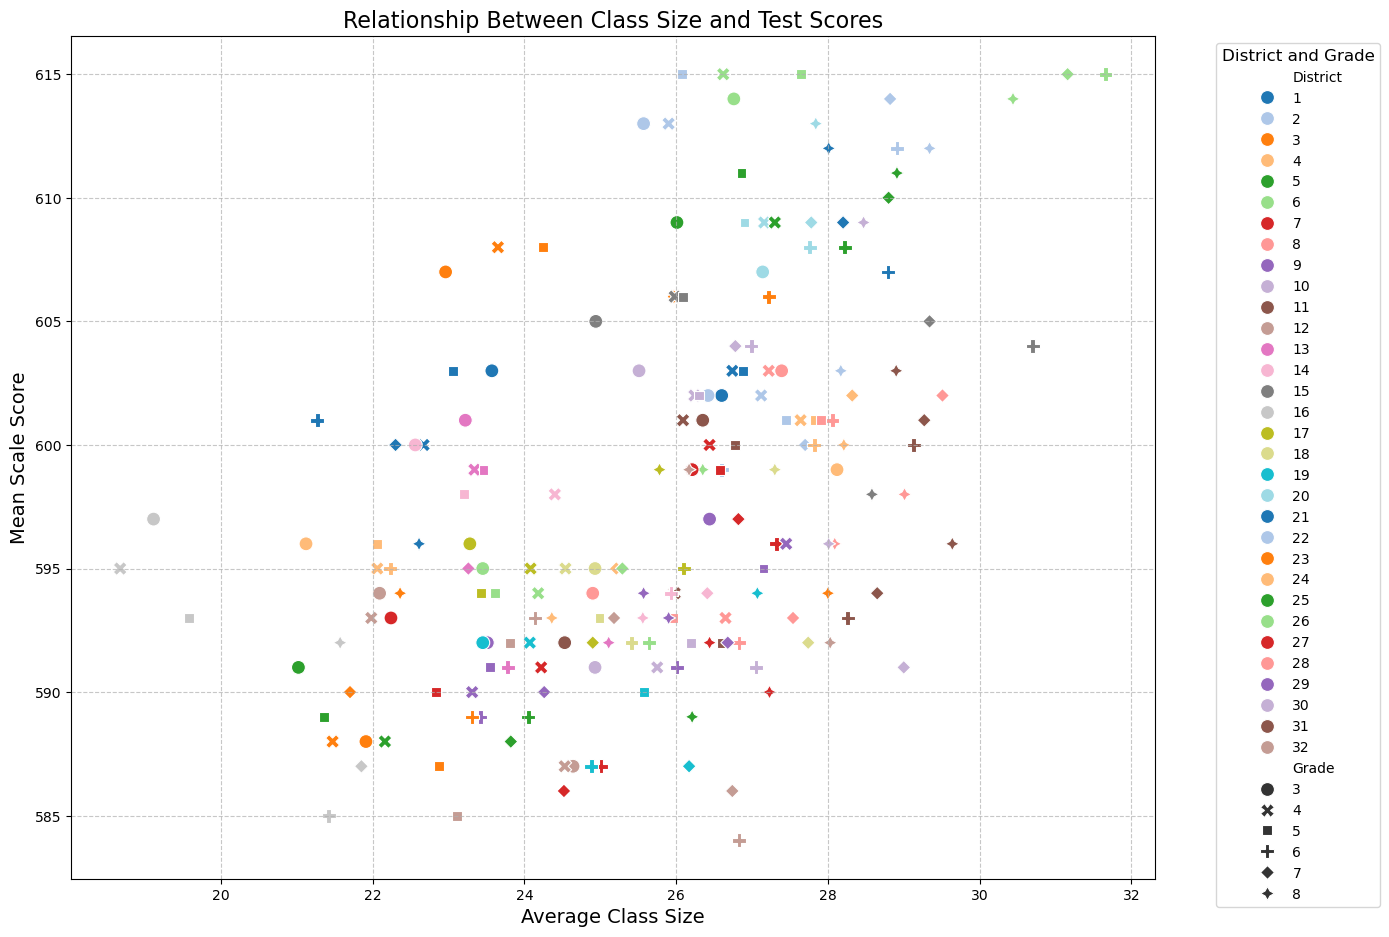

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(merge_data)

plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    data=df,
    x='Average Class Size',
    y='Mean Scale Score',
    hue='District',
    style='Grade',
    palette='tab20',  
    s=100  
)

plt.title('Relationship Between Class Size and Test Scores', fontsize=16)
plt.xlabel('Average Class Size', fontsize=14)
plt.ylabel('Mean Scale Score', fontsize=14)
plt.legend(title='District and Grade', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

A scatter plot alone does not provide enough insight into the strength or trend of the relationship between class size and test scores. By performing regression analysis, I can quantitatively assess the relationship between the two variables and determine the impact of class size on test scores.

In [ ]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt

data = merge_data[['Average Class Size', 'Mean Scale Score']]

X = data['Average Class Size']  
y = data['Mean Scale Score']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     60.35
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           4.82e-13
Time:                        02:46:13   Log-Likelihood:                -634.34
No. Observations:                 192   AIC:                             1273.
Df Residuals:                     190   BIC:                             1279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                558.2878      5

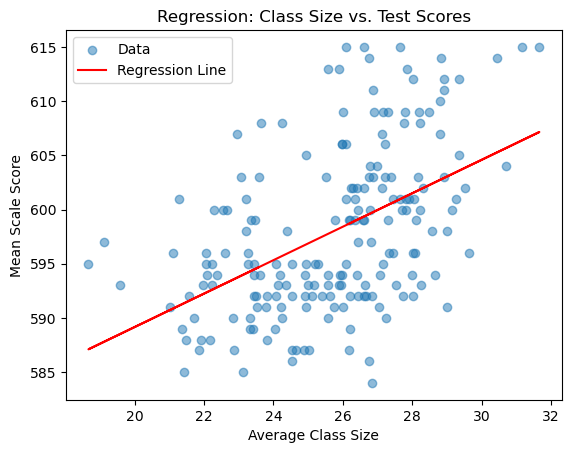

In [ ]:
plt.scatter(data['Average Class Size'], y, alpha=0.5, label='Data')  
plt.plot(data['Average Class Size'], model.predict(X), color='red', label='Regression Line')  
plt.xlabel('Average Class Size')
plt.ylabel('Mean Scale Score')
plt.title('Regression: Class Size vs. Test Scores')
plt.legend()
plt.show()

Next, to analyze the differences by grade, I conducted a regression analysis for each grade from 3 to 8.

                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     8.347
Date:                Fri, 06 Dec 2024   Prob (F-statistic):            0.00711
Time:                        02:46:14   Log-Likelihood:                -102.39
No. Observations:                  32   AIC:                             208.8
Df Residuals:                      30   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                562.1824     12

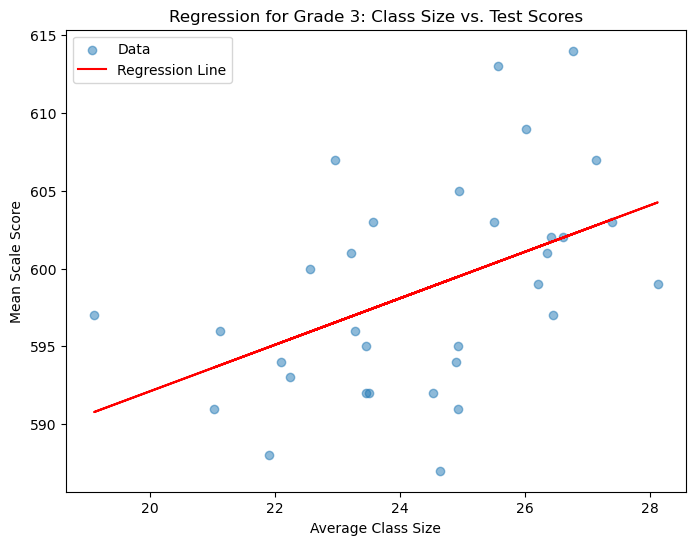

In [ ]:
grade_3_data = merge_data[merge_data['Grade'] == 3]

data3 = grade_3_data[['Average Class Size', 'Mean Scale Score']]

X = data3['Average Class Size']  
y = data3['Mean Scale Score']    

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
plt.scatter(data3['Average Class Size'], y, alpha=0.5, label='Data')  
plt.plot(data3['Average Class Size'], model.predict(X), color='red', label='Regression Line')  
plt.xlabel('Average Class Size')
plt.ylabel('Mean Scale Score')
plt.title('Regression for Grade 3: Class Size vs. Test Scores')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     10.44
Date:                Fri, 06 Dec 2024   Prob (F-statistic):            0.00299
Time:                        02:46:14   Log-Likelihood:                -103.88
No. Observations:                  32   AIC:                             211.8
Df Residuals:                      30   BIC:                             214.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                555.2188     13

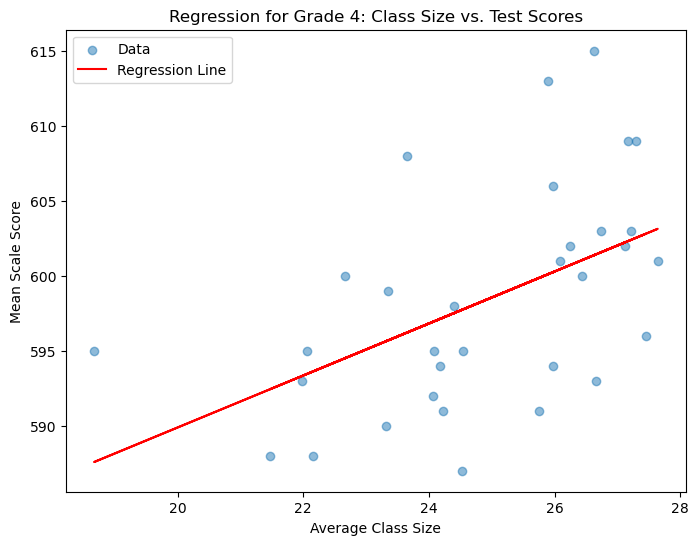

In [ ]:
grade_4_data = merge_data[merge_data['Grade'] == 4]

data4 = grade_4_data[['Average Class Size', 'Mean Scale Score']]

X = data4['Average Class Size']  
y = data4['Mean Scale Score']    

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
plt.scatter(data4['Average Class Size'], y, alpha=0.5, label='Data')  
plt.plot(data4['Average Class Size'], model.predict(X), color='red', label='Regression Line')  
plt.xlabel('Average Class Size')
plt.ylabel('Mean Scale Score')
plt.title('Regression for Grade 4: Class Size vs. Test Scores')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     11.13
Date:                Fri, 06 Dec 2024   Prob (F-statistic):            0.00228
Time:                        02:46:15   Log-Likelihood:                -105.76
No. Observations:                  32   AIC:                             215.5
Df Residuals:                      30   BIC:                             218.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                550.3238     14

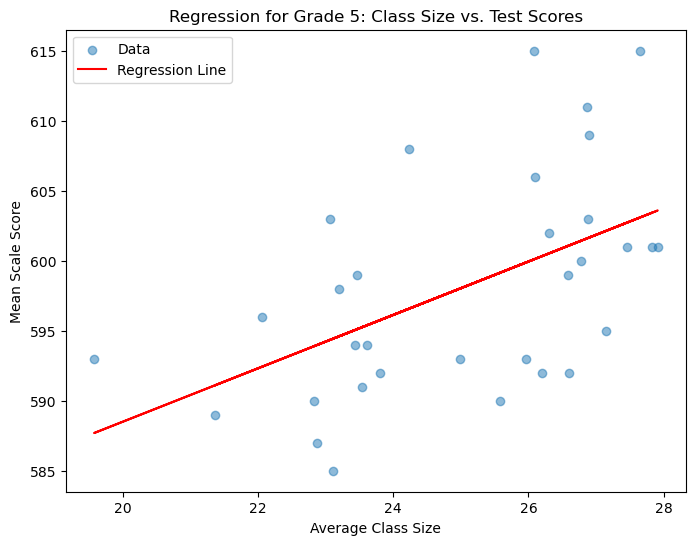

In [ ]:
grade_5_data = merge_data[merge_data['Grade'] == 5]

data5 = grade_5_data[['Average Class Size', 'Mean Scale Score']]

X = data5['Average Class Size']  
y = data5['Mean Scale Score']    

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
plt.scatter(data5['Average Class Size'], y, alpha=0.5, label='Data')  
plt.plot(data5['Average Class Size'], model.predict(X), color='red', label='Regression Line')  
plt.xlabel('Average Class Size')
plt.ylabel('Mean Scale Score')
plt.title('Regression for Grade 5: Class Size vs. Test Scores')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     22.74
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           4.47e-05
Time:                        02:46:16   Log-Likelihood:                -102.98
No. Observations:                  32   AIC:                             210.0
Df Residuals:                      30   BIC:                             212.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                540.0933     11

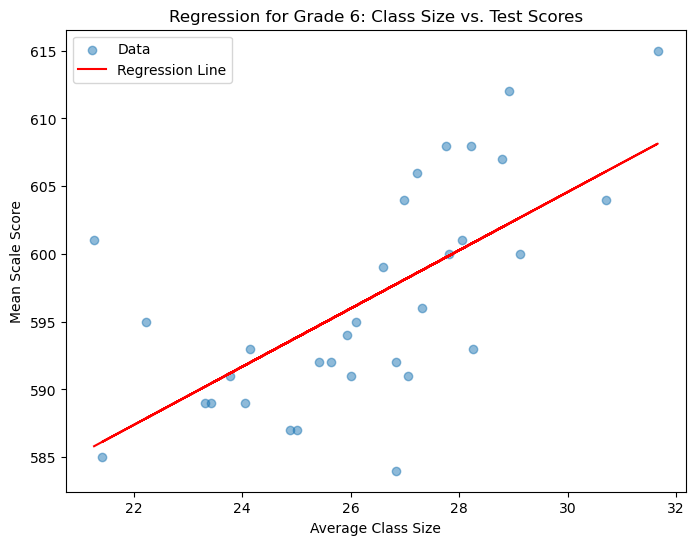

In [ ]:
grade_6_data = merge_data[merge_data['Grade'] == 6]

data6 = grade_6_data[['Average Class Size', 'Mean Scale Score']]

X = data6['Average Class Size']  
y = data6['Mean Scale Score']    

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
plt.scatter(data6['Average Class Size'], y, alpha=0.5, label='Data')  
plt.plot(data6['Average Class Size'], model.predict(X), color='red', label='Regression Line')  
plt.xlabel('Average Class Size')
plt.ylabel('Mean Scale Score')
plt.title('Regression for Grade 6: Class Size vs. Test Scores')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     16.90
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000281
Time:                        02:46:16   Log-Likelihood:                -105.49
No. Observations:                  32   AIC:                             215.0
Df Residuals:                      30   BIC:                             217.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                541.8843     13

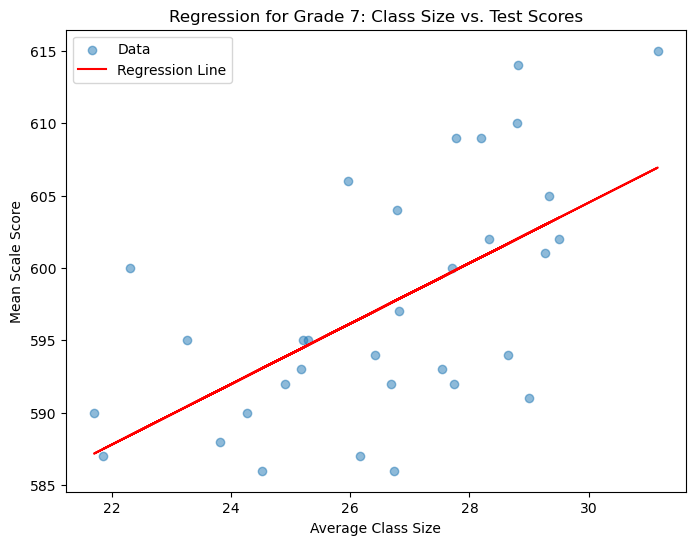

In [ ]:
grade_7_data = merge_data[merge_data['Grade'] == 7]

data7 = grade_7_data[['Average Class Size', 'Mean Scale Score']]

X = data7['Average Class Size']  
y = data7['Mean Scale Score']    

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
plt.scatter(data7['Average Class Size'], y, alpha=0.5, label='Data')  
plt.plot(data7['Average Class Size'], model.predict(X), color='red', label='Regression Line')  
plt.xlabel('Average Class Size')
plt.ylabel('Mean Scale Score')
plt.title('Regression for Grade 7: Class Size vs. Test Scores')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     12.92
Date:                Fri, 06 Dec 2024   Prob (F-statistic):            0.00115
Time:                        02:46:17   Log-Likelihood:                -102.80
No. Observations:                  32   AIC:                             209.6
Df Residuals:                      30   BIC:                             212.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                547.5239     14

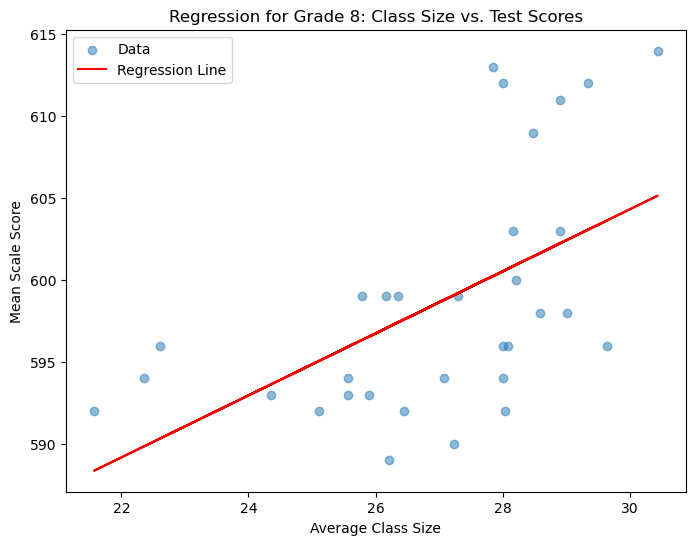

In [ ]:
grade_8_data = merge_data[merge_data['Grade'] == 8]

data8 = grade_8_data[['Average Class Size', 'Mean Scale Score']]

X = data8['Average Class Size']  
y = data8['Mean Scale Score']    

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(8, 6))
plt.scatter(data8['Average Class Size'], y, alpha=0.5, label='Data')  
plt.plot(data8['Average Class Size'], model.predict(X), color='red', label='Regression Line')  
plt.xlabel('Average Class Size')
plt.ylabel('Mean Scale Score')
plt.title('Regression for Grade 8: Class Size vs. Test Scores')
plt.legend()
plt.show()

## **Conclusion**

**Analysis Question 1: Does a smaller class size lead to better test scores?**

The analysis shows that, contrary to the common assumption that smaller class sizes lead to better academic performance, the relationship between class size and math test scores is actually positive. As the average class size increases, the mean scale score also increases. Specifically, the regression analysis indicates that larger class sizes are associated with higher test scores across the entire dataset. This finding suggests that, in this case, larger class sizes correlate with better performance in math tests. 

**Analysis Question 2: Is this trend consistent across all grade levels, or does it vary by grade?**

The trend observed across the entire dataset is largely consistent across different grade levels, though the strength of the relationship varies. For grades 3 to 8, the analysis indicates a positive correlation between class size and test scores, with a stronger relationship in higher grades. Specifically:

- For younger grades (Grade 3 to 5), the relationship between class size and test scores is weaker but still positive, suggesting that larger classes may provide more resources and opportunities for students.
  
- For older grades (Grade 6 to 8), the relationship strengthens, indicating that in higher grade levels, larger class sizes may be more effective, potentially due to better student autonomy or teaching resources available in larger classes.

Thus, while the positive trend between larger class sizes and better test scores holds across all grade levels, its significance and magnitude increase as the grade level rises.

**Limitations of the Analysis**

It is important to note that the sample size in this analysis is relatively small (32 observations per grade level), which limits the statistical power of the results. Additionally, the R-squared values for the regression models are modest, suggesting that class size alone explains only a small portion of the variation in test scores. This indicates that other factors, such as teacher quality, school funding, student engagement, and curriculum differences, may play a significant role in determining math test scores. These factors should be considered in future research and analysis.

**Policy Recommendation**

Based on these findings, policymakers should consider the broader context of school resources when making decisions about class sizes. While smaller class sizes may have perceived benefits in terms of individualized attention, larger class sizes might also contribute to better performance, especially in higher grades. It is essential to balance class size considerations with other factors such as teacher quality, school funding, and available educational resources. Additionally, further research with a larger sample size and more comprehensive variables is recommended to better understand the factors that influence student performance.